Brand preference. In a small-scale experimental study of the relation between degree of brand
liking (Y ) and moisture content (X1) and sweetness (X2) of the product, the following results
were obtained from the experiment based on a completely randomized design (data are coded)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm 

In [4]:
df = pd.read_csv('CH06PR05.txt',sep='\s+',header=None,names=['Y','X1','X2'])
df.head()


,Y,X1,X2
0,64.0,4.0,2.0
1,73.0,4.0,4.0
2,61.0,4.0,2.0
3,76.0,4.0,4.0
4,72.0,6.0,2.0


In [5]:
X1=df["X1"]
X2=df["X2"]
X=df[["X1","X2"]]
Y=df["Y"]

a. Obtain the scatter plot matrix and the correlation matrix. What information do these diagnostic aids provide here?

array([[<AxesSubplot:xlabel='Y', ylabel='Y'>,
        <AxesSubplot:xlabel='X1', ylabel='Y'>,
        <AxesSubplot:xlabel='X2', ylabel='Y'>],
       [<AxesSubplot:xlabel='Y', ylabel='X1'>,
        <AxesSubplot:xlabel='X1', ylabel='X1'>,
        <AxesSubplot:xlabel='X2', ylabel='X1'>],
       [<AxesSubplot:xlabel='Y', ylabel='X2'>,
        <AxesSubplot:xlabel='X1', ylabel='X2'>,
        <AxesSubplot:xlabel='X2', ylabel='X2'>]], dtype=object)

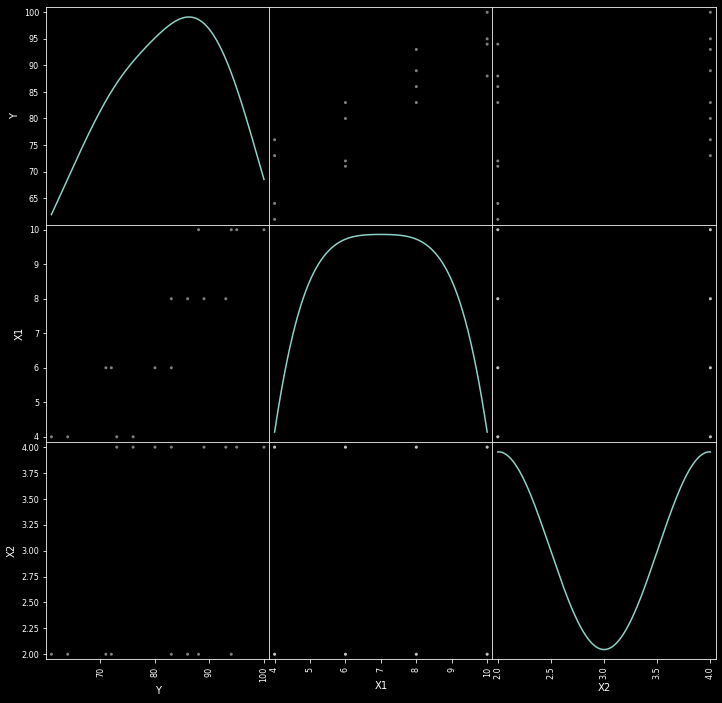

In [6]:
plt.style.use('dark_background')
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12, 12), color ='white')

In [7]:
matrix_correlation=df.corr()
print(matrix_correlation)

           Y            X1            X2
Y   1.000000  8.923929e-01  3.945807e-01
X1  0.892393  1.000000e+00  4.965068e-17
X2  0.394581  4.965068e-17  1.000000e+00


b. Fit regression model (6.1) to the data. State the estimated regression function. How is b1
interpreted here?

In [8]:
df_new = sm.add_constant(X)
df_new.head()

,const,X1,X2
0,1.0,4.0,2.0
1,1.0,4.0,4.0
2,1.0,4.0,2.0
3,1.0,4.0,4.0
4,1.0,6.0,2.0


In [9]:
X = df_new[['const','X1','X2']].values
print(X)

[[ 1.  4.  2.]
 [ 1.  4.  4.]
 [ 1.  4.  2.]
 [ 1.  4.  4.]
 [ 1.  6.  2.]
 [ 1.  6.  4.]
 [ 1.  6.  2.]
 [ 1.  6.  4.]
 [ 1.  8.  2.]
 [ 1.  8.  4.]
 [ 1.  8.  2.]
 [ 1.  8.  4.]
 [ 1. 10.  2.]
 [ 1. 10.  4.]
 [ 1. 10.  2.]
 [ 1. 10.  4.]]


In [10]:
X_trans=X.T
print(X_trans)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 4.  4.  4.  4.  6.  6.  6.  6.  8.  8.  8.  8. 10. 10. 10. 10.]
 [ 2.  4.  2.  4.  2.  4.  2.  4.  2.  4.  2.  4.  2.  4.  2.  4.]]


In [11]:
X_transX=X_trans @ X
print(X_transX)

[[ 16. 112.  48.]
 [112. 864. 336.]
 [ 48. 336. 160.]]


In [12]:
X_transX_minus1=np.linalg.inv(X_transX)
print(X_transX_minus1)

[[ 1.23750000e+00 -8.75000000e-02 -1.87500000e-01]
 [-8.75000000e-02  1.25000000e-02 -0.00000000e+00]
 [-1.87500000e-01  2.60208521e-17  6.25000000e-02]]


In [13]:
X_transY=X_trans @ Y
print(X_transY)

[1308. 9510. 3994.]


In [14]:
b=X_transX_minus1 @ X_transY
print(b)

[37.65   4.425  4.375]


In [15]:
fit=smf.ols("Y~X",data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.66e-09
Time:                        21:21:36   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8250      1.498     12.566      0.0

C:\Users\T. Dat\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The regression is:Y=37.65  + 4.425X1 + 4.375X2

c. Obtain the residuals and prepare a box plot of the residuals. What information does this plot
provide?

In [16]:
Y_hat=X @ b
print(Y_hat)

[64.1  72.85 64.1  72.85 72.95 81.7  72.95 81.7  81.8  90.55 81.8  90.55
 90.65 99.4  90.65 99.4 ]


In [17]:
e=Y-Y_hat
print(e)

0    -0.10
1     0.15
2    -3.10
3     3.15
4    -0.95
5    -1.70
6    -1.95
7     1.30
8     1.20
9    -1.55
10    4.20
11    2.45
12   -2.65
13   -4.40
14    3.35
15    0.60
Name: Y, dtype: float64


C:\Users\T. Dat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y'>

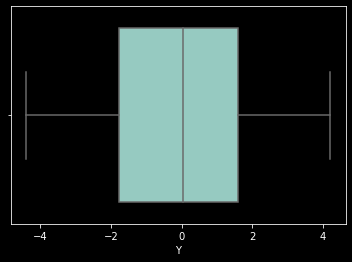

In [18]:
sns.boxplot(e)

No outliers

d. Plot the residuals against Yˆ , X1, X2, and X1X2 on separate graphs. Also prepare a normal
probability plot. Interpret the plots and summarize your findings.

C:\Users\T. Dat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Y'>

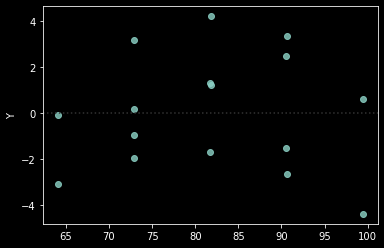

In [19]:
sns.residplot(Y_hat,e)

<AxesSubplot:xlabel='X1', ylabel='Y'>

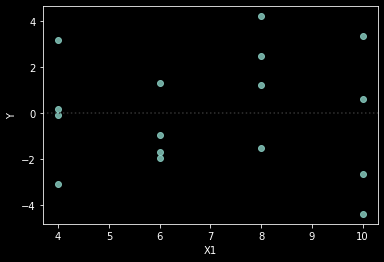

In [20]:
sns.residplot(X1,e)

<AxesSubplot:xlabel='X2', ylabel='Y'>

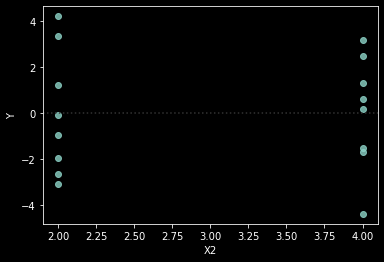

In [21]:
sns.residplot(X2,e)

<AxesSubplot:ylabel='Y'>

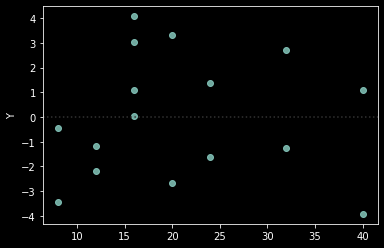

In [22]:
X12=X1*X2
sns.residplot(X12,e)

<AxesSubplot:xlabel='Y', ylabel='Y'>

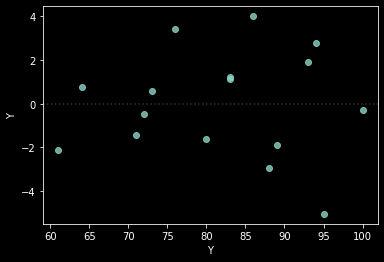

In [23]:
sns.residplot(Y,e)

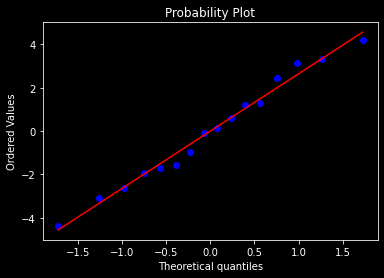

In [24]:
stats.probplot(e,plot=plt)
plt.show()

e. Conduct the Breusch-Pagan test for constancy of the error variance, assuming log σ2
i =
γ0 + γ1Xi1 + γ2Xi2; use α = .01. State the alternatives, decision rule, and conclusion.

In [25]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)


[('Lagrange multiplier statistic', 2.0441170950247773),
 ('p-value', 0.5633007107952055),
 ('f-value', 0.9520544997496626),
 ('f p-value', 0.4112848124598085)]

f. Conduct a formal test for lack of fit of the first-order regression function; use α = .01. State the alternatives, decision rule, and conclusion.

In [26]:
Y_bar=np.mean(Y)

H0:E{Y}=β0+β1X1+β2X2  vs Ha:E{Y}≠β0+β1X1+β2X2. Reject H0 if the test statistic is larger than the F critical value, which would indicate that the true regression function is not linear.

In [27]:
df["Y_bar"]=Y_bar

In [28]:
fit_1=smf.ols("Y_bar~X",data=df).fit()
print(fit_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Y_bar   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6.500
Date:                Tue, 10 Jan 2023   Prob (F-statistic):               1.00
Time:                        21:21:37   Log-Likelihood:                 474.99
No. Observations:                  16   AIC:                            -944.0
Df Residuals:                      13   BIC:                            -941.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.8750   1.91e-14   2.14e+15      0.0

C:\Users\T. Dat\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\T. Dat\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


6.6. Conduct a formal test for lack of fit of the first-order regression function; use α = .01. State
the alternatives, decision rule, and conclusion

In [29]:
n=len(X1)
print(n)

16


In [30]:
J=np.ones(n)
print(J)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
JY=J@Y
print(JY)

1308.0


In [32]:
Y_trans=Y.T
print(Y_trans)

0      64.0
1      73.0
2      61.0
3      76.0
4      72.0
5      80.0
6      71.0
7      83.0
8      83.0
9      89.0
10     86.0
11     93.0
12     88.0
13     95.0
14     94.0
15    100.0
Name: Y, dtype: float64


In [33]:
Y_transY=Y_trans @ Y
print(Y_transY)

108896.0


In [34]:
SSTO=Y_transY-((JY**2)/n)
print(SSTO)

1967.0


In [35]:
b_trans=b.T
print(b_trans)

[37.65   4.425  4.375]


In [36]:
SSE=Y_transY-(b_trans@X_transY)
print(SSE)

94.3000000002794


In [37]:
SSR=SSTO-SSE
print(SSR)

1872.6999999997206


In [38]:
p=3
MSR=SSR/(p-1)
MSE=SSE/(n-p)
print(MSR,MSE)

936.3499999998603 7.253846153867646


In [39]:
F_star=MSR/MSE
print(F_star)

129.0832449624827


In [40]:
R_squared=SSR/SSTO
print(R_squared)

0.9520589730552723


In [41]:
std_2b = MSE * X_transX_minus1
print(std_2b)

[[ 8.97663462e+00 -6.34711538e-01 -1.36009615e+00]
 [-6.34711538e-01  9.06730769e-02 -0.00000000e+00]
 [-1.36009615e+00  1.88751258e-16  4.53365385e-01]]


In [42]:
s2_b0 = std_2b[2,2]
print(s2_b0)
s_b1 = np.sqrt(s2_b0)
print(s_b1)

0.4533653846167279
0.6733241304280784


In [43]:
s2_b1 = std_2b[1,1]
print(s2_b1)
s_b2 = np.sqrt(s2_b1)
print(s_b2)

0.09067307692334568
0.3011197053056237


In [44]:
f = stats.f.ppf( q = 1 -0.01,dfn=p-1,dfd=n-p)
f

6.7009645358807814

#### b. What is the P-value of the test in part (a)?


F=qf(1−α,p−1,n−p)

In [45]:
p=stats.f.cdf(F_star,2,13)
print(p)

0.9999999973417387


In [46]:
p_val=1-p
print(p_val)

2.6582612777659165e-09


c. Estimate β1 and β2 jointly by the Bonferroni procedure, using a 99 percent family confidence coefficient. Interpret your results.

In [47]:
s_b2

0.3011197053056237

In [48]:
s_b1

0.6733241304280784

In [49]:
b1 = b[1]
print(b1)

4.425000000000026


In [50]:
b2 = b[2]
print(b2)

4.375000000000028


B=t(1−α/2g,n−p)

In [51]:
g = 2 # X1 and X2
p = 3
alpha = 0.01
n = 16

t_star =stats.t.ppf(1 - alpha/(2*g), n - p)
t_star

3.372467937858267

In [52]:
L1 = b1 - t_star * s_b2
U1 = b1 + t_star * s_b2
print(L1,U1)

3.40948344839948 5.440516551600571


99% CI for β1:
4.425±3.3724679⋅0.3011197

In [53]:
L2 = b2- t_star* s_b1
U2 = b2 + t_star * s_b1
print(L2,U2)

2.1042359583450363 6.6457640416550205


99% CI for β2:
4.375±3.3724679⋅0.6733241

Interpretation:

There is 99% confidence that the true β1 will be between 3.4094834 and 5.4405166
There is 99% confidence that the true β2 will be between 2.104236 and 6.645764


6.7

a. Calculate the coefficient of multiple determination R2. How is it interpreted here?

In [54]:
R_squared

0.9520589730552723

In [55]:
# X1 - X2
X = sm.add_constant(X)
fit_12=sm.OLS(Y,X).fit()
print(fit_12.rsquared_adj)

0.944683430448555


An  R2  of 95.2% reveals that 95.2% of the variability observed in the target variable is explained by the regression model.

6.8

a. Obtain an interval estimate of E{Yh } when Xh1 = 5 and Xh2 = 4. Use a 99 percent confidence
coefficient. Interpret your interval estimate

In [56]:
Xh1=5
Xh2=4

In [57]:
Xh=np.array([[1],[5],[4]])
Xh

array([[1],
       [5],
       [4]])

In [58]:
Xh_trans=Xh.T
print(Xh_trans)

[[1 5 4]]


In [59]:
s_squared_Yh=Xh_trans@std_2b@Xh
print(s_squared_Yh)

[[1.26942308]]


In [60]:
s_Yh=np.sqrt(s_squared_Yh)
print(s_Yh)

[[1.12668677]]


In [61]:
Yh=Xh_trans@b
print(Yh)

[77.275]


In [62]:
# t value
alpha = 0.01
t = stats.t.ppf(q = 1 - alpha/2, df=n-3)
t

3.012275838207184

In [63]:
# Confidence interval
L = Yh+ t*s_Yh
U = Yh - t*s_Yh
print('Confidence interval: ({}, {})'.format(L, U))

Confidence interval: ([[80.66889133]], [[73.88110867]])


The interval estimate of E[Yh] is 73.8811087 ≤ E[Yh] ≤ 80.6688913

Interpretation: there is 99% confidence that the true response value is between 73.8811087 and 80.6688913

b. Obtain a prediction interval for a new observation Yh(new) when Xh1 = 5 and Xh2 = 4. Use a 99 percent confidence coefficient

In [64]:
s2_prd=MSE+s_squared_Yh
print(s2_prd)


[[8.52326923]]


In [65]:
s_prd = np.sqrt(s2_prd)
print(s_prd)

[[2.91946386]]


In [66]:
L_prd = Yh - t*s_prd
U_prd = Yh  + t*s_prd
L_prd, U_prd

(array([[68.48076955]]), array([[86.06923045]]))

The interval estimate of E[Yh(new)] is 68.4807696 ≤ E[Yh(new)] ≤ 86.0692304
Interpretation: there is 99% confidence that the true response value is between 68.4807696 and 86.0692304